# Module 2 Exercises

The exercises in this notebook are similar to what you have seen in the lab. The **`arlues`** package that is being used for mining association rules needs data to be of type factor. Therefore it takes lots of pre processing converting the data to right type for association rule mining. 

This notebook uses auto sales data for resale of cars. This could be a regression problem. The two fields of data **`dateCreated`** and **`lastSeen`** could be indicators of when a car came into the store and when it left the store (or sold). If we take the difference in days then we can try to predict number of days it took for the car to be re sold. 

Here lets try to find if there are patterns of features that occur frequently. Read the data from `/dsa/data/DSA-8630/autos.csv`

**Activity 1: ** Read the auto_sales data into a variable called auto_sales

In [3]:
Sys.setlocale(locale="C") 
auto_sales = read.csv('/dsa/data/DSA-8630/autos.csv')
head(auto_sales)


[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,,1993,manuell,0,golf,150000,0,benzin,volkswagen,,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,Jeep_Grand_Cherokee_Overland,privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,GOLF_4_1_4__3TRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Export,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07


**Activity 2: ** Trim both the leading and trailing white spaces from name column in auto_sales

In [4]:
auto_sales_groups <- split(auto_sales, 3)
print('auto_sales_groups',str(nrow(auto_sales_groups)))
sum=0;
name=list();
for (grp in auto_sales_groups) {
sum = sum + nrow(grp)
tmp=lapply(grp['name'], trimws);
outlist = append(name,list(tmp))
name=outlist
}
name = unlist(name, recursive = TRUE, use.names = FALSE)
print('total number of elemets in df',str(nrow(auto_sales)))
print('total number of elemets in subgroup',str(sum))
print('name',str(length(name)))
auto_sales$name = name;
head(auto_sales)

 NULL
[1] "auto_sales_groups"
 int 189349
[1] "total number of elemets in df"
 num 189349
[1] "total number of elemets in subgroup"
 int 189349
[1] "name"


dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,,1993,manuell,0,golf,150000,0,benzin,volkswagen,,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,Jeep_Grand_Cherokee_Overland,privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,GOLF_4_1_4__3TRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Export,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07


**Activity 3: ** Replace the underscores between the words in name column with white spaces

In [5]:
# Your code for activity 3 goes here..
auto_sales_groups <- split(auto_sales, 3)
print('auto_sales_groups',str(nrow(auto_sales_groups)))
sum=0;
name=list();
for (grp in auto_sales_groups) {
sum = sum + nrow(grp)
tmp = gsub("_", " ", tmp$name, perl = TRUE)
outlist = append(name,list(tmp))
name=outlist
}
name = unlist(name, recursive = TRUE, use.names = FALSE)
print('total number of elemets in df',str(nrow(auto_sales)))
print('total number of elemets in subgroup',str(sum))
print('name',str(length(name)))
auto_sales$name = name;
head(auto_sales)


 NULL
[1] "auto_sales_groups"
 int 189349
[1] "total number of elemets in df"
 num 189349
[1] "total number of elemets in subgroup"
 int 189349
[1] "name"


dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
2016-03-24 11:52:17,Golf 3 1.6,privat,Angebot,480,test,,1993,manuell,0,golf,150000,0,benzin,volkswagen,,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5 Sportback 2.7 Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,Jeep Grand Cherokee Overland,privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
2016-03-17 16:54:04,GOLF 4 1 4 3TRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
2016-03-31 17:25:20,Skoda Fabia 1.4 TDI PD Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
2016-04-04 17:36:23,BMW 316i e36 Limousine Bastlerfahrzeug Export,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07


Lets generate the days column by substracting the **lastSeen** and **dateCreated** columns. 

**Reference: **

- [lubridate](https://www.r-statistics.com/2012/03/do-more-with-dates-and-times-in-r-with-lubridate-1-1-0/)
- [Handling date-times in R](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/ColeBeck/datestimes.pdf)


You can work with dates data type in R using either built-in POSIXt library or external packages like chron package, lubridate package. There are two POSIXt types, POSIXct and POSIXlt. "ct" stands for calendar time, it stores the number of seconds since the origin. "lt", or local time, keeps the date as a list of time attributes (such as "hour" and "mon").

In below piece of code, we are trying to substract two dates. You can directly substract the dates if there are in proper date format. So we are converting them in to Posixt class with a format and then converting them into date type.

In [6]:
# Import lubridate package that has cool functions to play with dates
library(lubridate)

auto_sales$days = as.Date(format(as.POSIXct((auto_sales$lastSeen) ,format = "%Y-%m-%d %X"))) -
as.Date(format(as.POSIXct((auto_sales$dateCreated),format ="%Y-%m-%d %X")))


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [7]:
head(auto_sales$days)

Time differences in days
[1] 14 14 22  0  6  2

**Activity 4: ** Remove the columns dateCrawled, dateCreated and lastSeen from dataframe

In [8]:
# Your code for activity 4 goes here..
auto_sales[["dateCrawled"]]<-NULL
auto_sales[["dateCreated"]]<-NULL
auto_sales[["lastSeen"]]<-NULL
head(auto_sales)

name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures,postalCode,days
Golf 3 1.6,privat,Angebot,480,test,,1993,manuell,0,golf,150000,0,benzin,volkswagen,,0,70435,14 days
A5 Sportback 2.7 Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,0,66954,14 days
Jeep Grand Cherokee Overland,privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,0,90480,22 days
GOLF 4 1 4 3TRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,0,91074,0 days
Skoda Fabia 1.4 TDI PD Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,0,60437,6 days
BMW 316i e36 Limousine Bastlerfahrzeug Export,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,0,33775,2 days


**Activity 5: ** Convert the columns "Price", "yearOfRegistration", "powerPS", "kilometer","monthOfRegistration","nrOfPictures","postalCode" and "days" to factor type using lapply function. You can use column indices (1, 4, 7, 9, 11, 12, 16, 17, 18) for the operation. 

In [9]:
# Your code for activity 5 goes here..
auto_sales[,c(1,4,7,9,11,12,16,17,18)]=lapply(auto_sales[,c(1,4,7,9,11,12,16,17,18)],as.factor)


**Activity 6: ** Verify the data type of all columns. Make sure all columns are of factor type before we create transactions from auto-sales dataframe. 

In [10]:
# Your code for activity 6 goes here..

str(auto_sales)

'data.frame':	189349 obs. of  18 variables:
 $ name               : Factor w/ 128113 levels "     AUDI A4 S LINE      VOLLAUSSTATUNG      ",..: 43092 2369 49334 41709 93792 14742 79782 103515 34722 104650 ...
 $ seller             : Factor w/ 2 levels "gewerblich","privat": 2 2 2 2 2 2 2 2 2 2 ...
 $ offerType          : Factor w/ 2 levels "Angebot","Gesuch": 1 1 1 1 1 1 1 1 1 1 ...
 $ price              : Factor w/ 4230 levels "0","1","2","3",..: 199 2759 1992 558 1053 266 735 1 2463 404 ...
 $ abtest             : Factor w/ 2 levels "control","test": 2 2 2 2 2 2 2 2 1 2 ...
 $ vehicleType        : Factor w/ 9 levels "","andere","bus",..: 1 5 9 6 6 8 4 8 3 6 ...
 $ yearOfRegistration : Factor w/ 127 levels "1000","1111",..: 75 93 86 83 90 77 86 62 96 80 ...
 $ gearbox            : Factor w/ 3 levels "","automatik",..: 3 3 2 3 3 3 3 3 3 3 ...
 $ powerPS            : Factor w/ 624 levels "0","1","2","3",..: 1 191 164 76 70 103 110 51 126 102 ...
 $ model              : Factor w/ 251 lev

In [11]:
library("arules")

Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



**Activity 7: ** Now, coerce the data set into transactions. Save this transactions to auto_trans variable.

In [12]:
# Your code for activity 7 goes here..
auto_trans <- as(auto_sales, "transactions")
auto_trans


transactions in sparse format with
 189349 transactions (rows) and
 141549 items (columns)

**Activity 8: ** Draw a frequency plot for the generated transactions with a support of 0.5

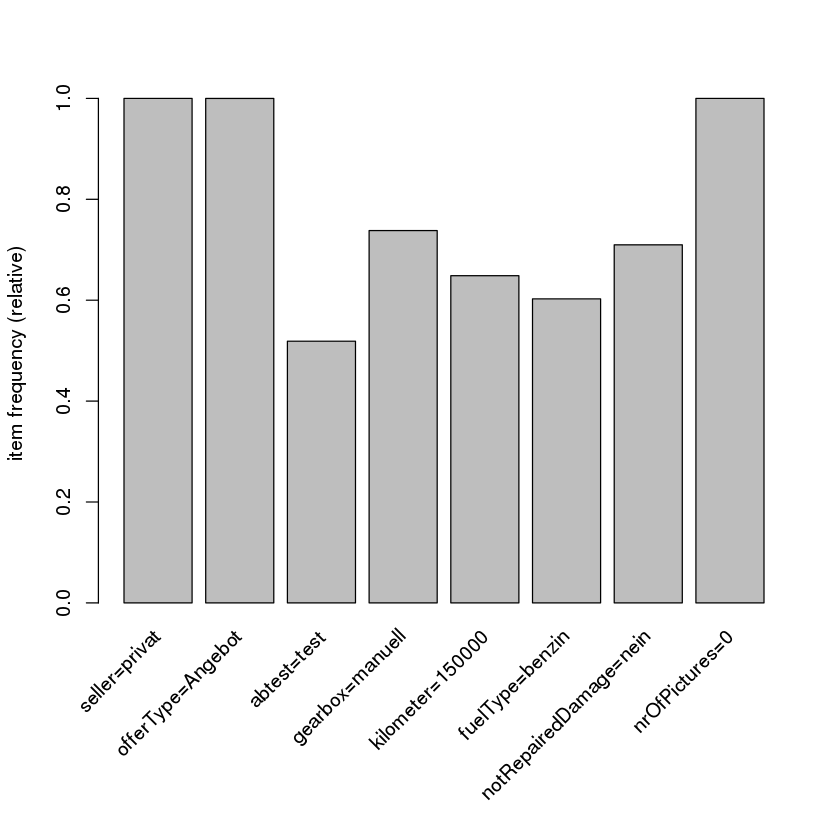

In [13]:
# Your code for activity 8 goes here..
itemFrequencyPlot(auto_trans,support=.5)


**Activity 9: ** Generate association rules for the transactions in auto_trans with support of 0.3 and confidence of 0.6

In [14]:
# Your code for activity 9 goes here..
rules <- apriori(auto_trans, parameter = list(support = 0.03, confidence = 0.6, maxlen=20))
rules


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5    0.03      1
 maxlen target   ext
     20  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5680 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[141549 item(s), 189349 transaction(s)] done [0.38s].
sorting and recoding items ... [87 item(s)] done [0.05s].
creating transaction tree ... done [0.14s].
checking subsets of size 1 2 3 4 5 6 7 8 9 done [1.18s].
writing ... [23600 rule(s)] done [0.00s].
creating S4 object  ... done [0.10s].


set of 23600 rules 

In [15]:
library("arulesViz")

Loading required package: grid


**Activity 10: ** Draw a scatter plot for the generated rules using 'support' as the measure and 'confidence' for shading.

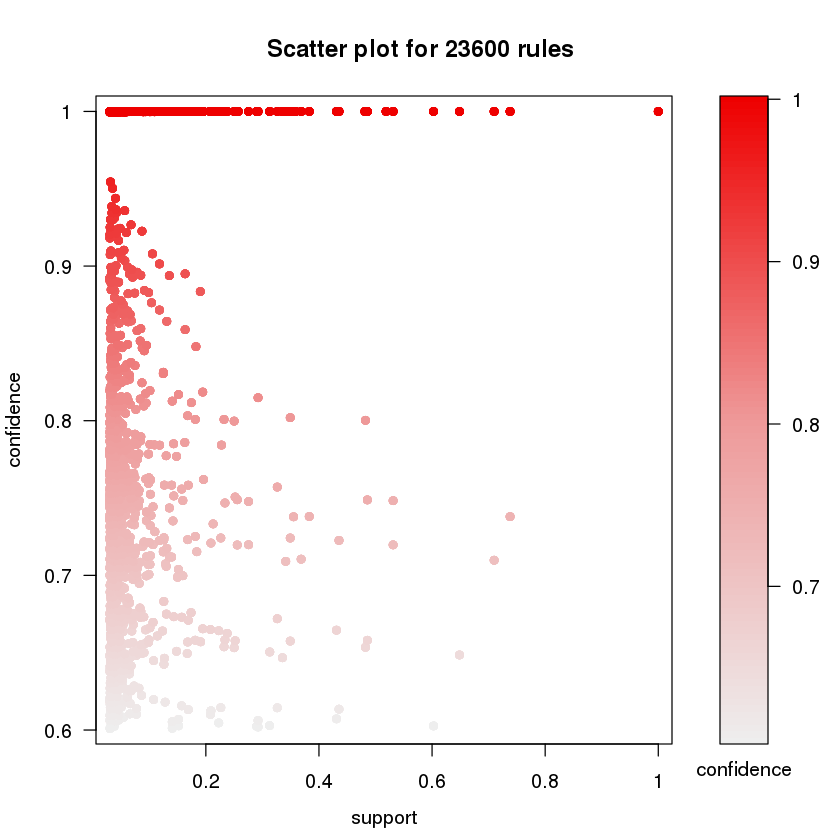

In [16]:
# Your code for activity 10 goes here..
plot(rules, method = "scatter", measure = "support", shading = "confidence", interactive = FALSE, data = auto_sales,)


**Activity 11: ** Draw a matrix plot for the generated transactions using measures 'confidence', 'lift'. Draw the plot with ordered transactions.

Itemsets in Antecedent (LHS)
   [1] "{seller=privat,offerType=Angebot,gearbox=manuell,kilometer=150000,brand=bmw}"                                                                
   [2] "{seller=privat,offerType=Angebot,gearbox=manuell,kilometer=150000,brand=bmw,nrOfPictures=0}"                                                 
   [3] "{offerType=Angebot,gearbox=manuell,kilometer=150000,brand=bmw,nrOfPictures=0}"                                                               
   [4] "{offerType=Angebot,gearbox=manuell,kilometer=150000,brand=bmw}"                                                                              
   [5] "{gearbox=manuell,kilometer=150000,brand=bmw}"                                                                                                
   [6] "{seller=privat,gearbox=manuell,kilometer=150000,brand=bmw}"                                                                                  
   [7] "{seller=privat,gearbox=manuell,kilometer=150000,brand=bmw,nrOfP

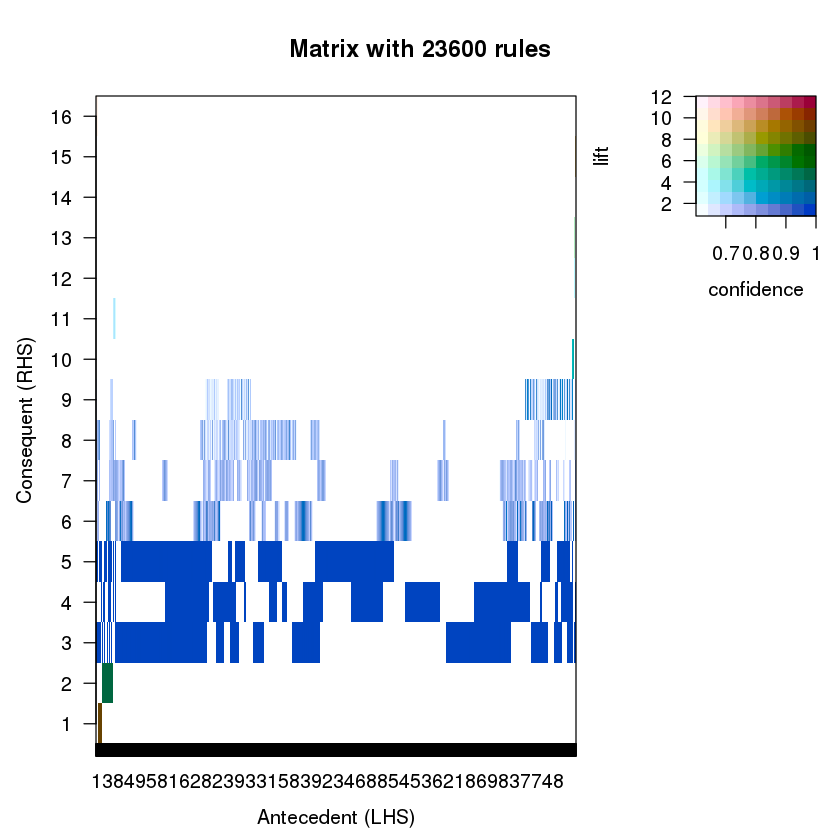

In [17]:
# Your code for activity 11 goes here..
plot(rules,method="matrix",measure=c("lift","confidence"),control=list(reorder=TRUE))


**Activity 12: ** Draw a grouped matrix plot for the rules.

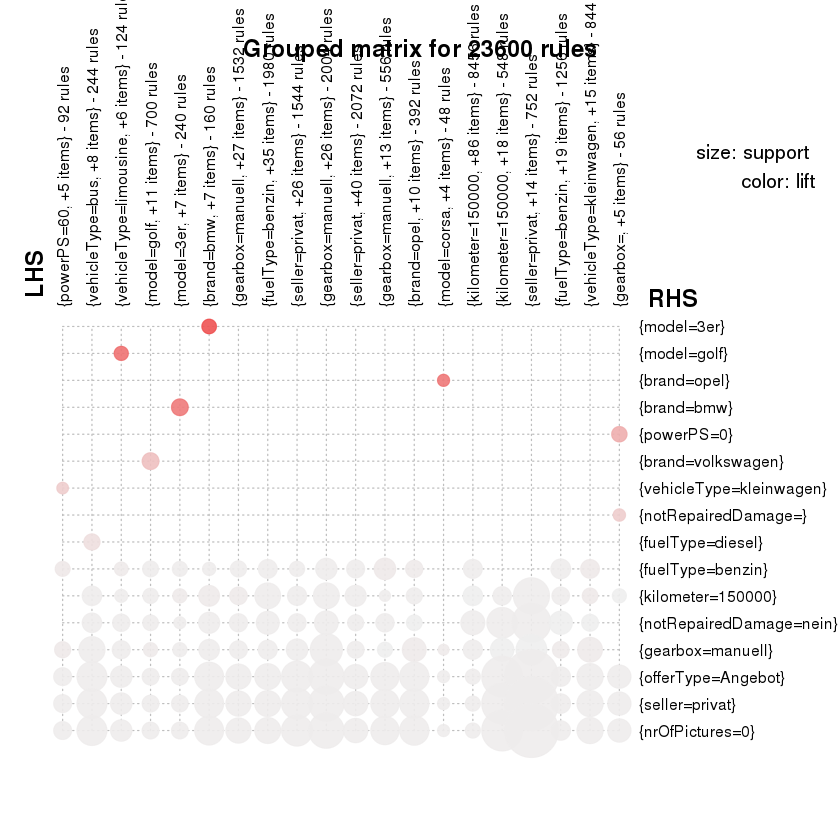

In [18]:
# Your code for activity 12 goes here..
plot(rules,method="grouped")


**Activity 13: ** Write the generated rules to a csv file called "auto_sales.csv"

In [20]:
# Your code for activity 13 goes here..
write(rules, file = "auto_sales.csv", sep = ",", col.names = NA)

